In [21]:
import pandas as pd
from matplotlib import pyplot as plt

In [23]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [12]:
data_1km_pers = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/IIEE_IceEdgeLenght_CorrelationStudy/Data/1km_persistance_output.csv", index_col='date')
data_1km_pers.index = pd.to_datetime(data_1km_pers.index, format='%Y-%m-%d')

data_10km_pers = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/IIEE_IceEdgeLenght_CorrelationStudy/Data/10km_persistance_output.csv", index_col='date')
data_10km_pers.index = pd.to_datetime(data_10km_pers.index, format='%Y-%m-%d')

data_10km_pers['IIEE'] = data_10km_pers['IIEE']*100  # Adjust for erronous IIEE implementation

In [43]:
(data_1km_pers['IIEE'] / data_10km_pers['IIEE']).mean()

0.9985671090774197

In [42]:
data_10km_pers['IIEE']

date
2019-01-04    103500
2019-01-09     72700
2019-01-10     74500
2019-01-11    141300
2019-01-16     98100
               ...  
2021-12-22     66800
2021-12-23     80400
2021-12-29     90700
2021-12-30     67800
2021-12-31     67900
Name: IIEE, Length: 434, dtype: int64

In [13]:
data_1km_pers['mean_length'].corr(data_1km_pers['IIEE'])

0.5113368426077047

In [14]:
data_10km_pers['mean_length'].corr(data_10km_pers['IIEE'])

0.6152508617054995

In [15]:
data_1km_pers['mean_length'].corr(data_10km_pers['mean_length'])

0.9458129611299271

In [16]:
data_1km_pers['IIEE'].corr(data_10km_pers['IIEE'])

0.9995098186982779

In [17]:
(data_1km_pers['IIEE']/data_1km_pers['mean_length']).corr((data_10km_pers['IIEE'] / data_10km_pers['mean_length']))

0.9747168114857799

In [18]:
monthly_mean_lenght_10km = data_10km_pers.groupby(pd.Grouper(freq="M"))['mean_length'].mean()

monthly_mean_IIEE_10km = data_10km_pers.groupby(pd.Grouper(freq="M"))['IIEE'].mean()

normalized_iiee_10km = monthly_mean_IIEE_10km / monthly_mean_lenght_10km

In [19]:
monthly_mean_lenght_1km = data_1km_pers.groupby(pd.Grouper(freq="M"))['mean_length'].mean()

monthly_mean_IIEE_1km = data_1km_pers.groupby(pd.Grouper(freq="M"))['IIEE'].mean()

normalized_iiee_1km = monthly_mean_IIEE_1km / monthly_mean_lenght_1km

In [40]:
print((monthly_mean_lenght_1km / monthly_mean_lenght_10km).mean())

13.305576141357061


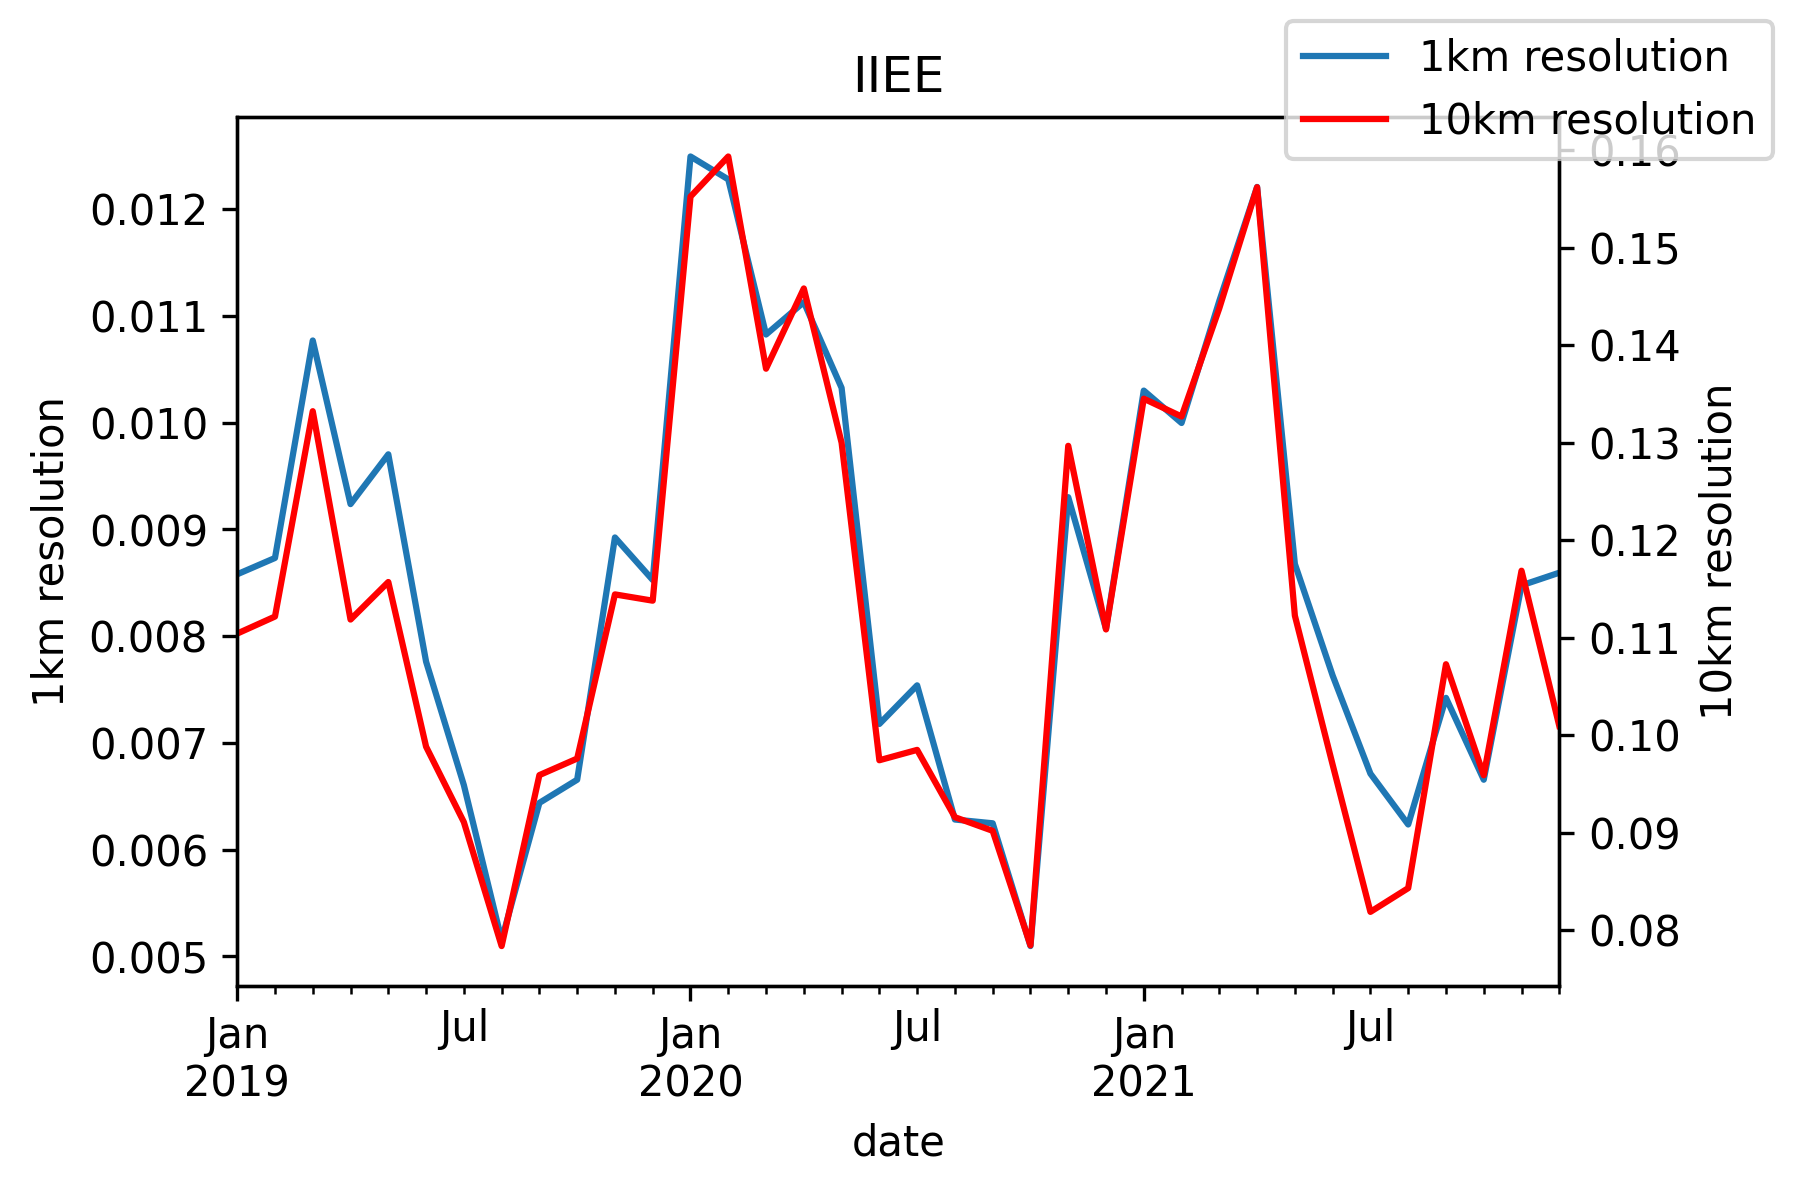

In [38]:
ax = normalized_iiee_1km.plot(label='1km resolution')
ax2 = ax.twinx()
ax.set_title('IIEE')
ax.set_ylabel('1km resolution')
ax2.set_ylabel('10km resolution')
normalized_iiee_10km.plot(ax=ax2, color='red', label="10km resolution")
fig = ax.get_figure()
fig.legend()
plt.tight_layout()
fig.savefig('normalized_iiee.png', bbox_inches=0, transparent=False)

In [11]:
monthly_mean_lenght_10km = data_10km_pers.groupby(pd.Grouper(freq="M"))['mean_length'].mean()

monthly_mean_IIEE_10km = data_10km_pers.groupby(pd.Grouper(freq="M"))['IIEE'].mean()

<AxesSubplot:label='0ef8ec95-d466-41a3-a621-f78bee547548', xlabel='date'>

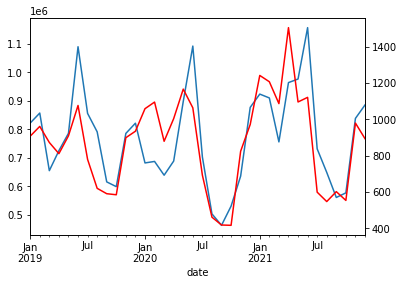

In [12]:
ax = monthly_mean_lenght_10km.plot()
ax2 = ax.twinx()
monthly_mean_IIEE_10km.plot(ax=ax2, color='red')

In [ ]:
# monthly_mean_lenght_pers = data_1km_pers.groupby(pd.PeriodIndex(data_1km_pers.index, freq="M"))['mean_length'].agg({'Low Value':'min','High Value':'max','Mean':'mean'})
monthly_mean_lenght_pers = data_1km_pers.groupby(pd.Grouper(freq="M"))['mean_length'].agg(totallow_value='min', high_value='max', mean='mean')
monthly_mean_IIEE_pers = data_1km_pers.groupby(pd.PeriodIndex(data_1km_pers.index, freq="M"))['IIEE'].mean()

In [ ]:
monthly_mean_lenght_pers

In [ ]:
ax = monthly_mean_lenght_pers.plot()
ax2 = ax.twinx()
monthly_mean_IIEE_pers.plot(ax=ax2, color='red')

In [3]:
data_1km = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/IIEE_IceEdgeLenght_CorrelationStudy/Data/1km_output.csv", index_col='date')
data_10km = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/IIEE_IceEdgeLenght_CorrelationStudy/Data/10km_output.csv", index_col='date')

In [ ]:
data_10km

In [4]:
data_1km['mean_length'].corr(data_1km['IIEE'])

0.7229255372251941

In [5]:
data_10km['mean_length'].corr(data_10km['IIEE'])

0.7499301651499853

In [ ]:
monthly_mean_lenght = data_10km.groupby(pd.PeriodIndex(data_10km.index, freq="M"))['mean_length'].mean()

monthly_mean_IIEE = data_10km.groupby(pd.PeriodIndex(data_10km.index, freq="M"))['IIEE'].mean()

In [ ]:
ax = monthly_mean_lenght.plot()
ax2 = ax.twinx()
monthly_mean_IIEE.plot(ax=ax2, color='red')